### IRIS dataset

- 데이터 분석 실습에서 가장 많이 활용되는 붓꽃 데이터셋
- 총 3개의 붓꽃 종에 대한 꽃잎과 꽃밭침의 길이 및 너비 측정 데이터가 각 종마다 50개씩 총 150개 저장

<img src='img/iris1.jpg' width='600' height='400' align='left'>
<img src='img/iris2.png' width='300' height='300' align='center'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets   # sklearn에서 제공하는 데이터셋

In [ ]:
# 라이브러리
# iris 데이터셋 - ver2) sklearn

In [2]:
dataset = datasets.load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
dataset['data'].shape

(150, 4)

In [8]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### 1. 꽃잎, 꽃받침 수치를 값으로, 속성명을 컬럼으로 가지는 데이터프레임 생성

In [3]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 2. 원본 데이터를 활용하여 종이름 데이터를 컬럼으로 추가

- 기본. 저장되는 값은 숫자로 구분된 데이터
- 심화. seaborn 데이터와 동일하게 종이름으로 구분되는 데이터
    - 힌트 : 딕셔너리 타입 & for 반복문
    - 힌트 : for 반복문 & 조건문

In [12]:
dataset['target'].shape

(150,)

In [13]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df['species'] = dataset['target']
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [16]:
# for 반복문 & 조건문 => 모든 컬럼이 동일한 종으로 저장되기 때문에 잘못된 결과
for i in dataset['target']:
    if i == 0:
        df['species'] = 'setosa'
    elif i == 1:
        df['species'] = 'versicolor'
    else:
        df['species'] = 'virginica'

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,virginica
1,4.9,3.0,1.4,0.2,virginica
2,4.7,3.2,1.3,0.2,virginica
3,4.6,3.1,1.5,0.2,virginica
4,5.0,3.6,1.4,0.2,virginica
5,5.4,3.9,1.7,0.4,virginica
6,4.6,3.4,1.4,0.3,virginica
7,5.0,3.4,1.5,0.2,virginica
8,4.4,2.9,1.4,0.2,virginica
9,4.9,3.1,1.5,0.1,virginica


In [19]:
# for 반복문 & 조건문 => 리스트를 컬럼으로 추가하는 방법
tmp = []
for i in dataset['target']:
    if i == 0:
        tmp.append('setosa')
    elif i == 1:
        tmp.append('versicolor')
    else:
        tmp.append('virginica')

In [20]:
df['species'] = tmp

In [22]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
# 딕셔너리 타입을 이용해서 맵핑을 수행(조건문을 생략할 수 있는 방법)
# 딕셔너리 타입 : 종번호 & 종이름
dict_map = {0:'setosa', 1:'versicolor', 2:'virginica'}
# zip() 함수, dict() 함수
# zip(x, y) : x,y 자료형 길이가 같아야하고 동일한 인덱스끼리 묶어줌
dict_map2 = dict(zip(range(3), dataset['target_names']))

# a=4 if x>2 else 10
df['species'] = [dict_map2[i] for i in dataset['target']]

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
tmp = []
for i in range(3):
    tmp.append(i)

In [27]:
[ i for i in range(3)]

[0, 1, 2]

### Pie Plot(원형 차트)
- 전체에서 특정 범주가 차지하는 비중/비율을 파악하기 위해 사용
- pandas.DataFrame/Series.plot(kind='pie')
    - Series 객체 : 하나의 원형 차트 생성
    - DataFrame 객체 : 각 열 마다 하나씩 원형 차트 생성
- pandas.DataFrame/Series.plot.pie(y=None, figsize=None, subplots=False)
    - y : 하나의 컬럼에 대해 원형 차트를 생성할 때 사용할 컬럼명
    - figsize : 생성할 figure 객체 크기(tuple)
    - subplots : y 값으로 하나의 컬럼을 사용하는 것이 아니라 전체 df를 사용할 때 True로 지정

In [32]:
# 전체 종별 데이터 평균
df1 = df.groupby('species').mean()
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


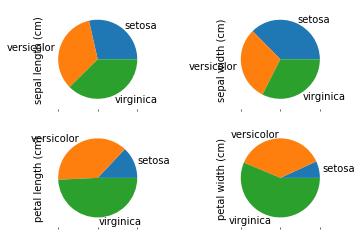

In [39]:
# 하나의 속성(feature)별로 종별 파이 차트 생성
# 결과 : 
# 파라미터 : subplot, layout, legend
# y label
df1.plot(kind='pie', subplots=True, layout=(2,2), legend=False )
plt.show()

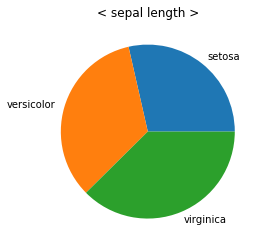

In [43]:
# 추가 파라미터 : label(컬럼이름), title
df1.plot(kind='pie', y='sepal length (cm)',label='', title='< sepal length >',
        legend=False)

### 이미지 저장하기

- matplotlib.pyplot.savefig(fname, bbox_inches=None, pad_inches=0.1)
    - fname : 별도의 경로를 지정하지 않으면 현재 작업 경로에 이미지파일 저장, png, pdf 형식을 지원하며 jpg형식은 별도의 변환 작업이 필요
        - JPG 파일로 변환
            - import Image
            - Image.open('file.png').save('file2.jpg','JPEG')
            
    - bbox_inches : 파일로 저장되는 영역을 설정 ('tight' : 시각화된 figure에 맞추어 이미지 파일 생성 )
    - pad_inches : 저장되는 이미지 파일의 여백 지정

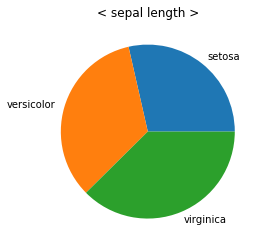

In [48]:
df1.plot(kind='pie', y='sepal length (cm)',label='', title='< sepal length >',
        legend=False)

# plt.savefig('pie1.png')
# plt.savefig('pie2.png', bbox_inches='tight')
plt.savefig('pie3.png', bbox_inches='tight', pad_inches=5)

### Bar plot(막대형 차트)

- pandas.DataFrame/Series.plot(kind='bar')
    - Series 객체 : 하나의 막대 차트 생성
    - DataFrame 객체 : 각 열 마다 하나씩 막대 차트 생성
- pandas.DataFrame/Series.plot.bar(x=None, y=None, rot=None, figsize=None)
    - x : x축을 기준으로 사용되는 데이터
    - y : y축을 기준으로 사용되는 데이터(막대로 표현되는 수치)
    - rot : x축 라벨 회전 각도(기본값=옆으로 누은 형태), 0/1/-1일 때 수직
    

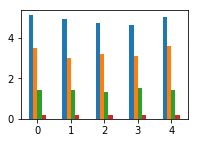

In [55]:
# 1번 ~ 5번 데이터에 대한 feature 값 비교
# 첫번째 방법
df[:5].plot(kind='bar', legend=False, rot=0, figsize=(3,2))

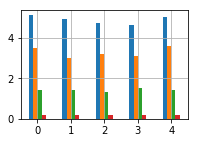

In [57]:
# 두번째 방법
# 파라미터 : grid
df[:5].plot.bar(legend=False, rot=0, figsize=(3,2), grid=True)

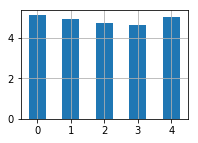

In [62]:
# 하나의 속성(sepal length)에 대해서 5개 샘플의 길이를 bar
# df['sepal length (cm)'][:5].plot.bar()
# df[:5].plot.bar(legend=False, y='sepal length (cm)', rot=0, figsize=(3,2), grid=True)
df[:5].plot(kind='bar',legend=False, y='sepal length (cm)', rot=0, figsize=(3,2), grid=True)

### Histogram(히스토그램)

- pandas.DataFrame/Series.plot(kind='hist')
    - Series 객체 : 하나의 히스토그램 생성
    - DataFrame 객체 : 각 열 마다 하나씩 히스토그램 차트 생성,<br> subplots=True & layout = (n,m)
- pandas.DataFrame/Series.hist(bins=10)
    - bins : 히스토그램 구간 수를 나타내는 값으로 구간 수가 너무 작으면(=간격이 너무 넓으면) 세부 분포 파악이 어렵고, 구간 수가 너무 많으면 전체적인 분포 파악이 어렵다.

In [ ]:
# 전체 종을 대상으로 각 속성(꽃받침 길이/너비, 꽃잎 길이/너비)에 대한 히스토그램

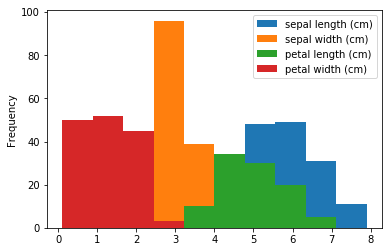

In [64]:
# 첫번째 방법 : 
df.plot(kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DBC737F98>,
      dtype=object)

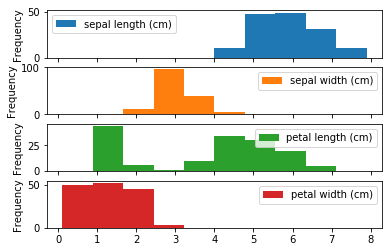

In [65]:
# 두번째 방법
# 데이터프레임에서 플롯을 생성할 때 각 컬럼(속성)별로 subplot 생성 => subplots=True
df.plot(kind='hist', subplots=True)

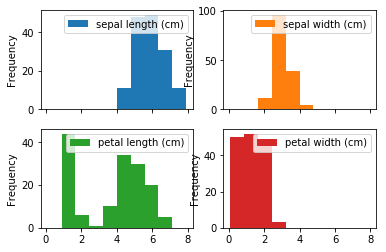

In [67]:
# 세번째 방법
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DBDAA8F98>,
      dtype=object)

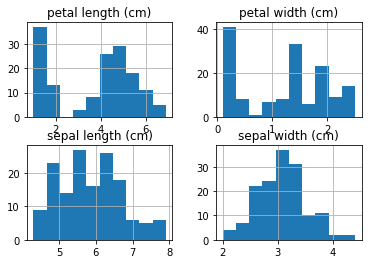

In [68]:
# 네번째 방법
df.hist()

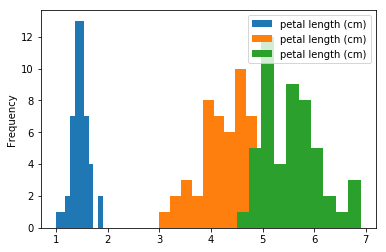

In [71]:
# 종 별로 petal length에 대한 히스토그램
# 첫번째 방법 - 문제 발생
for s in df['species'].unique():   # dataset['target_names']
    df[df['species'] == s]['petal length (cm)'].plot(kind='hist')
    
plt.legend()
plt.show()

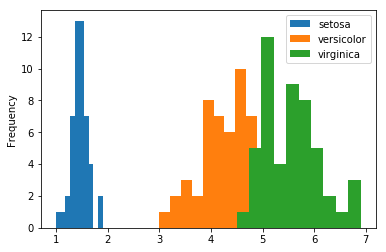

In [72]:
# 두번째 방법
for s in df['species'].unique():   # dataset['target_names']
    df[df['species'] == s]['petal length (cm)'].plot(kind='hist', label=s)
    
plt.legend()
plt.show()

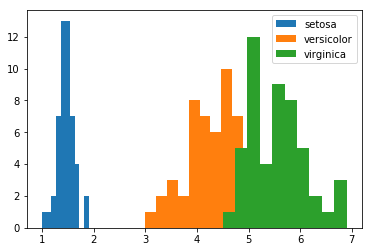

In [74]:
# 세번째 방법
# plot(kind='hist')
# hist()
for s in df['species'].unique():   # dataset['target_names']
    df[df['species'] == s]['petal length (cm)'].hist(label=s, grid=False)
    # grid=True(default)
    
plt.legend()
plt.show()

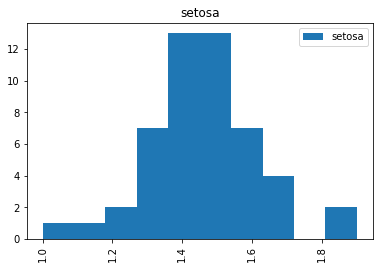

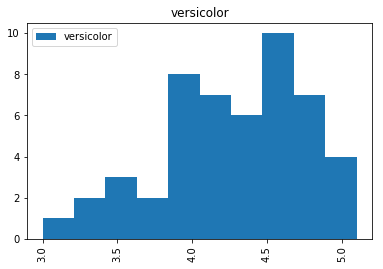

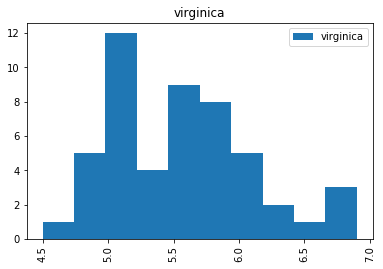

In [79]:
# 하나의 플롯에 모아서 그리지 않고 종별로 개별 플롯 생성
for s in df['species'].unique():   # dataset['target_names']
#     df[df['species'] == s]['petal length (cm)'].hist(label=s, grid=False)
    df[df['species'] == s]['petal length (cm)'].hist(by=df['species'], label=s)
    plt.legend()    

plt.show()

### box-plot(상자그림)

- pandas.DataFrame/Series.plot(kind='box')
- pandas.DataFrame/Series.boxplot()

In [ ]:
# 종별 꽃받침 길이 속성에 대한 box-plot
# 사용할 구조 : 컬럼 => 계층색인(길이, 종), 로우(인덱스)

In [82]:
# 구조 만들기 순서
# 로우 계층색인 => 컬럼으로 올려주기
# 인덱스 컬럼 추가 => 0~50, 0~50, 0~50
df['idx'] = pd.Series(df.index).apply(lambda x: x%50)

In [84]:
df.tail(50)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,idx
100,6.3,3.3,6.0,2.5,virginica,0
101,5.8,2.7,5.1,1.9,virginica,1
102,7.1,3.0,5.9,2.1,virginica,2
103,6.3,2.9,5.6,1.8,virginica,3
104,6.5,3.0,5.8,2.2,virginica,4
105,7.6,3.0,6.6,2.1,virginica,5
106,4.9,2.5,4.5,1.7,virginica,6
107,7.3,2.9,6.3,1.8,virginica,7
108,6.7,2.5,5.8,1.8,virginica,8
109,7.2,3.6,6.1,2.5,virginica,9


In [87]:
# idx, species
tmp1 = df.set_index(['idx', 'species'])

In [89]:
tmp1 = tmp1.unstack()

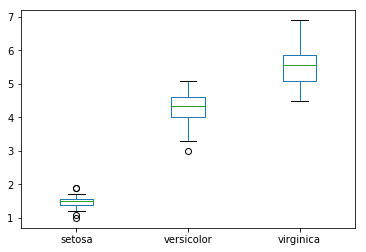

In [91]:
tmp1['petal length (cm)'].plot(kind='box')

### scatter-plot(산포도)

- 두 종류의 변수만 포함하여 적용할 수 있음
- 두 변수 간의 관계에 대해 분산 분포를 통해 파악할 수 있음
- pandas.DataFrame/Series.plot(kind='scatter', x=None, y=None)
    - x : 가로축(x축)에 사용될 데이터/컬럼명
    - y : 세로축(y축)에 사용될 데이터/컬럼명
- pandas.DataFrame/Series.plot.scatter(x, y, s=None, c=None)
    - x : 가로축(x축)에 사용될 데이터/컬럼명
    - y : 세로축(y축)에 사용될 데이터/컬럼명
    - s : 각 점의 크기
    - c : 각 점의 색상

In [6]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


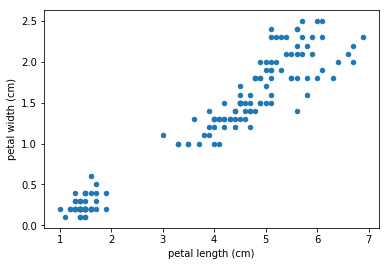

In [8]:
# 모든 종에 대하여 꽃받침 길이(petal length) 대 너비(petal width) 데이터 분산 분포
df.plot(kind='scatter', x='petal length (cm)', y = 'petal width (cm)')

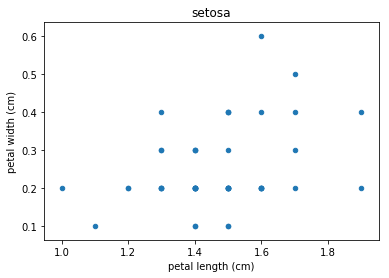

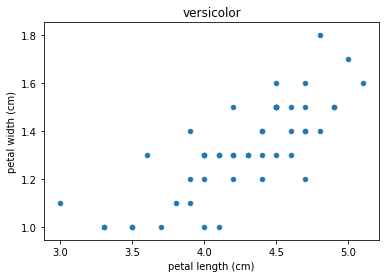

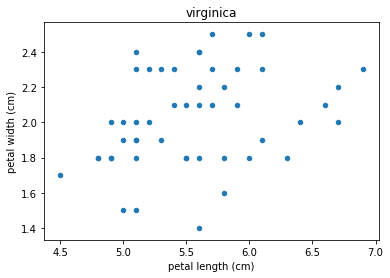

In [9]:
# 종별로 scatter plot 생성
for s in df['species'].unique():  # dataset['target_names']
    df[df['species'] == s].plot(kind='scatter', x='petal length (cm)', y = 'petal width (cm)')
    plt.title(s)


In [11]:
# 종 기준으로 산포도 색상을 다르게 지정
# df.plot.scatter(x, y, c)
# color 적용을 위한 정수형 종구분을 컬럼으로 추가
# dataset['target']
df['map'] = dataset['target']

In [12]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,map
0,5.1,3.5,1.4,0.2,setosa,0


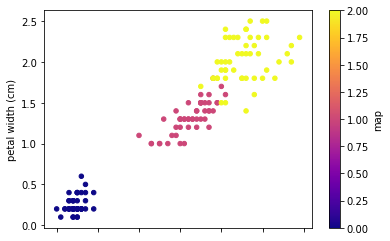

In [16]:
df.plot.scatter( x='petal length (cm)', y = 'petal width (cm)', c='map', colormap='plasma')

### scatter_matrix(산포 행렬)

- 두 개 이상의 변수에 대해 데이터가 분산된 정도를 비교할 수 있는 시각화
- pandas.plotting > scatter_matrix 모듈 import

In [17]:
# 길이 속성에 대해 다른 속성과의 상관관계 파악
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,map
0,5.1,3.5,1.4,0.2,setosa,0


In [18]:
from pandas.plotting import scatter_matrix

In [20]:
df.iloc[:, :-2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


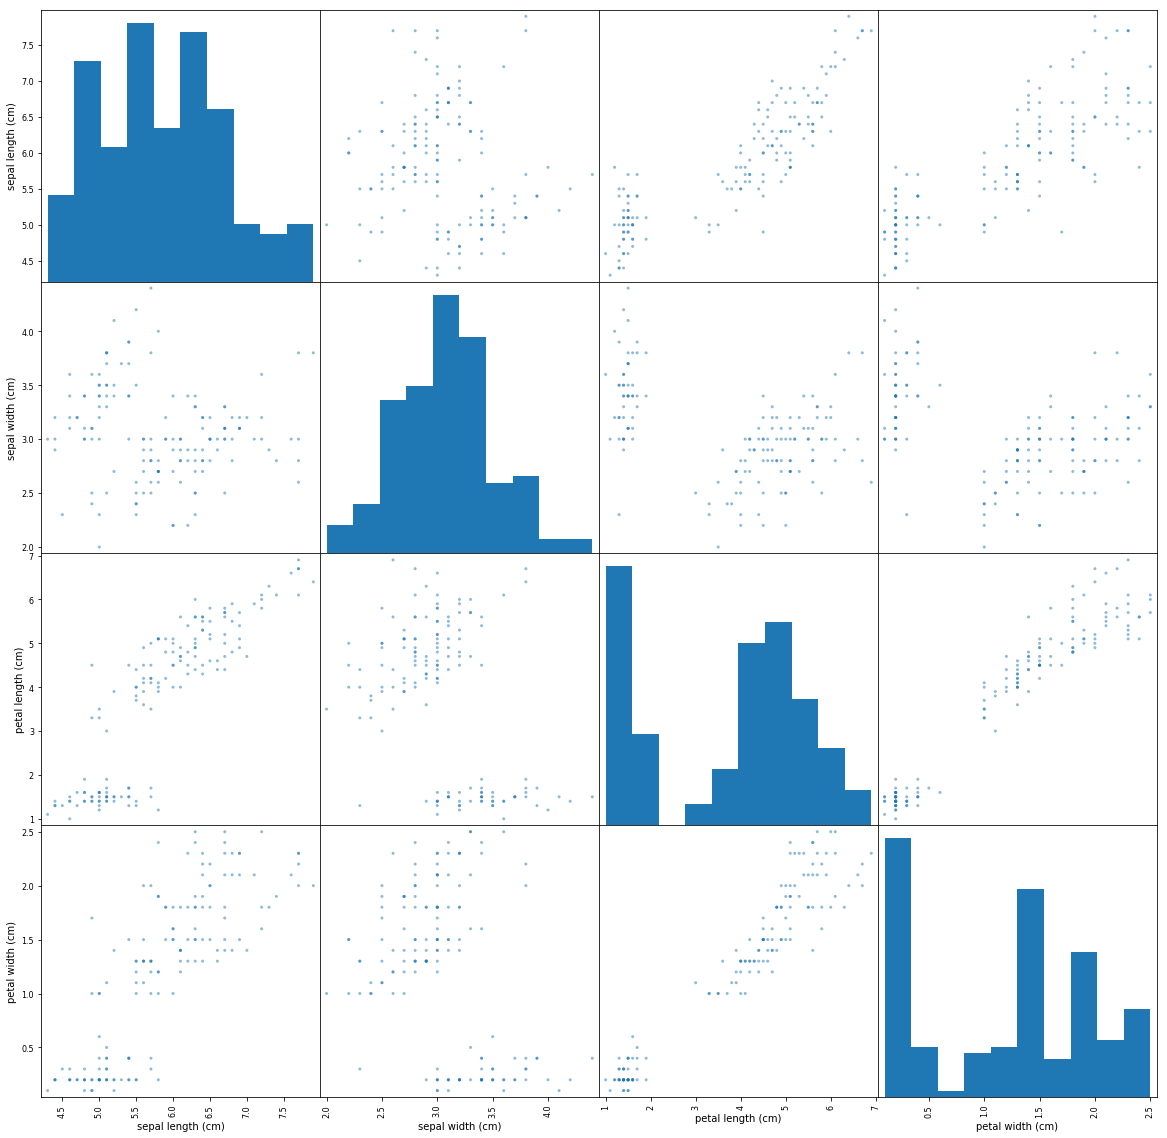

In [24]:
scatter_matrix(df.iloc[:, :-2], figsize=(20,20))
plt.show()